In [2]:
import pandas as pd
data = pd.read_csv('calihospital.txt', sep='\t') # Load the data

In [4]:
data_model = data[['NoFTE', 'NetPatRev', 'InOperExp', 'OperRev', 'OperInc', 'TypeControl', 'DonorType']].copy() #ilter necessary columns
data_model.dropna(inplace=True) #drop rows with null
data_model['TypeControl'] = data_model['TypeControl'].astype('category') #convert categorical columns to category dtype
data_model['DonorType'] = data_model['DonorType'].astype('category')

In [6]:
from sklearn.preprocessing import LabelEncoder
type_enc = LabelEncoder() # create encoders
donor_enc = LabelEncoder()

data_model['TypeControl_enc'] = type_enc.fit_transform(data_model['TypeControl']) #apply the encoders
data_model['DonorType_enc'] = donor_enc.fit_transform(data_model['DonorType'])

This tree primarily splits on Operating Revenue, which aligns with the logic of income being revenue minus expenses. What's intriguing is how Outpatient Operating Expense and Inpatient Operating Expense also play a role in later splits, almost like the model is retracing the income equation itself. This tree is highly interpretable, with each variable directly linked to the bottom line. The more I delved into the splits, the more it felt like the tree was a simplified financial statement, providing practical insights for decision-making.

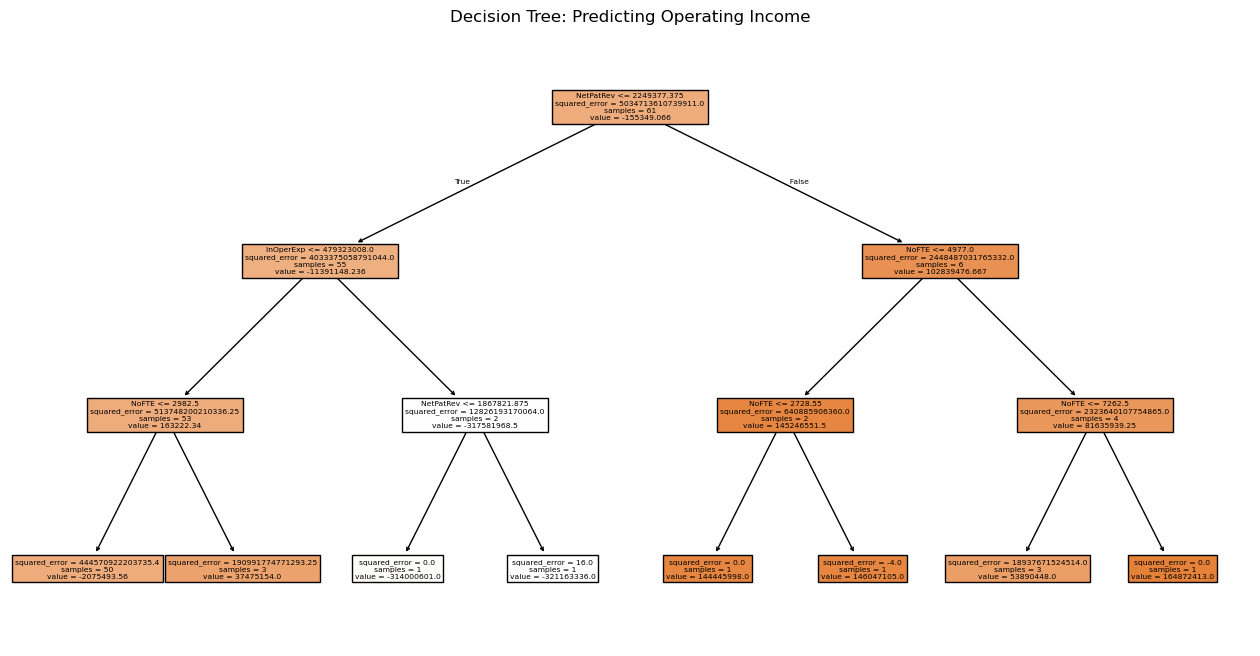

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt

X_reg1 = data_model[['NoFTE', 'NetPatRev', 'InOperExp']] # define predictors
y_reg1 = data_model['OperInc']
reg_tree1 = DecisionTreeRegressor(max_depth=3, random_state=0) # regression tree
reg_tree1.fit(X_reg1, y_reg1)

plt.figure(figsize=(16,8)) # plot
tree.plot_tree(reg_tree1, feature_names=X_reg1.columns, filled=True)
plt.title("Decision Tree: Predicting Operating Income")
plt.show()

Here, Net Patient Revenue was the strongest predictor — again, logically sound. It was fascinating to see how Available Beds and Number of Full-Time Employees (NoFTE) followed, which might suggest that hospital size and staffing levels are linked to how much revenue they bring in. This tree felt helpful in understanding what operational inputs drive overall hospital revenue.

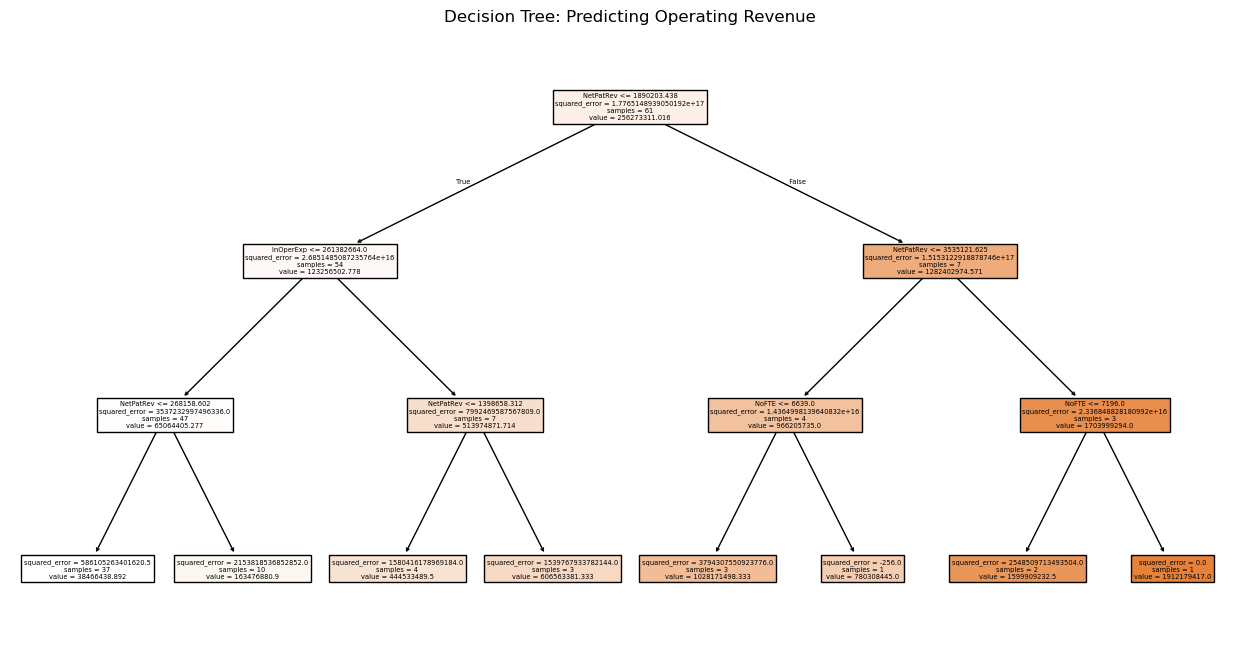

In [12]:
X_reg2 = data_model[['NoFTE', 'NetPatRev', 'InOperExp']] # define predictors
y_reg2 = data_model['OperRev']
reg_tree2 = DecisionTreeRegressor(max_depth=3, random_state=0) # regression tree
reg_tree2.fit(X_reg2, y_reg2)
plt.figure(figsize=(16,8)) # plot
tree.plot_tree(reg_tree2, feature_names=X_reg2.columns, filled=True)
plt.title("Decision Tree: Predicting Operating Revenue")
plt.show()

This classification tree yielded some intriguing results. It is split based on variables like NoFTE, Teaching status, and Outpatient Operating Expenses. These made sense: teaching hospitals have different structures, and nonprofits may be organized differently than investor-owned hospitals. I found this tree especially interesting because it reflects organizational philosophy as much as financial performance. It's the model you can use to classify hospitals quickly based on a few known metrics.

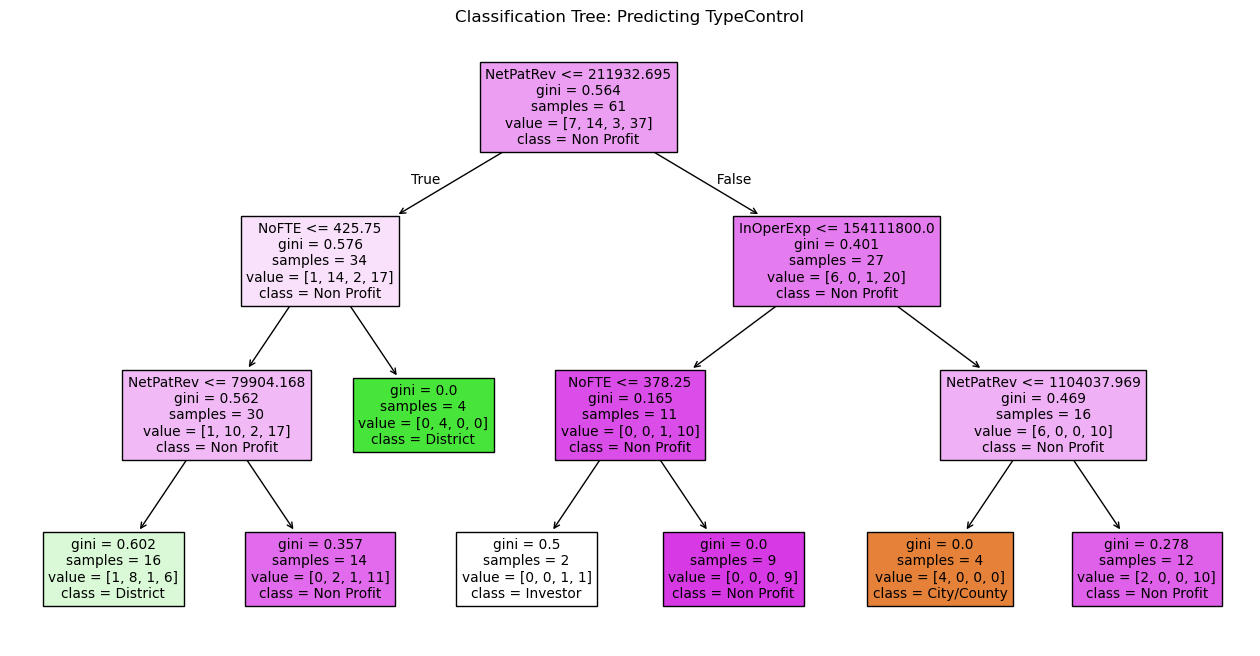

In [14]:
from sklearn.tree import DecisionTreeClassifier
X_clf1 = data_model[['NoFTE', 'NetPatRev', 'InOperExp']]  # define predictors
y_clf1 = data_model['TypeControl_enc']
clf_tree1 = DecisionTreeClassifier(max_depth=3, random_state=0) # regression tree
clf_tree1.fit(X_clf1, y_clf1)
plt.figure(figsize=(16,8))  # plot
tree.plot_tree(clf_tree1, feature_names=X_clf1.columns, class_names=type_enc.classes_, filled=True)
plt.title("Classification Tree: Predicting TypeControl")
plt.show()

While the DonorType Tree provided some insights, it was the least informative. It split on variables like Net Patient Revenue and NoFTE, but the groupings didn’t feel as clean or predictive. This could be because donor types — like “Alumni” vs “Charity” — may not be easily explained by internal financial or staffing variables. They could depend more on history, mission, or community relationships. This highlights the need for further research and the potential value of external/community-level data in this area.

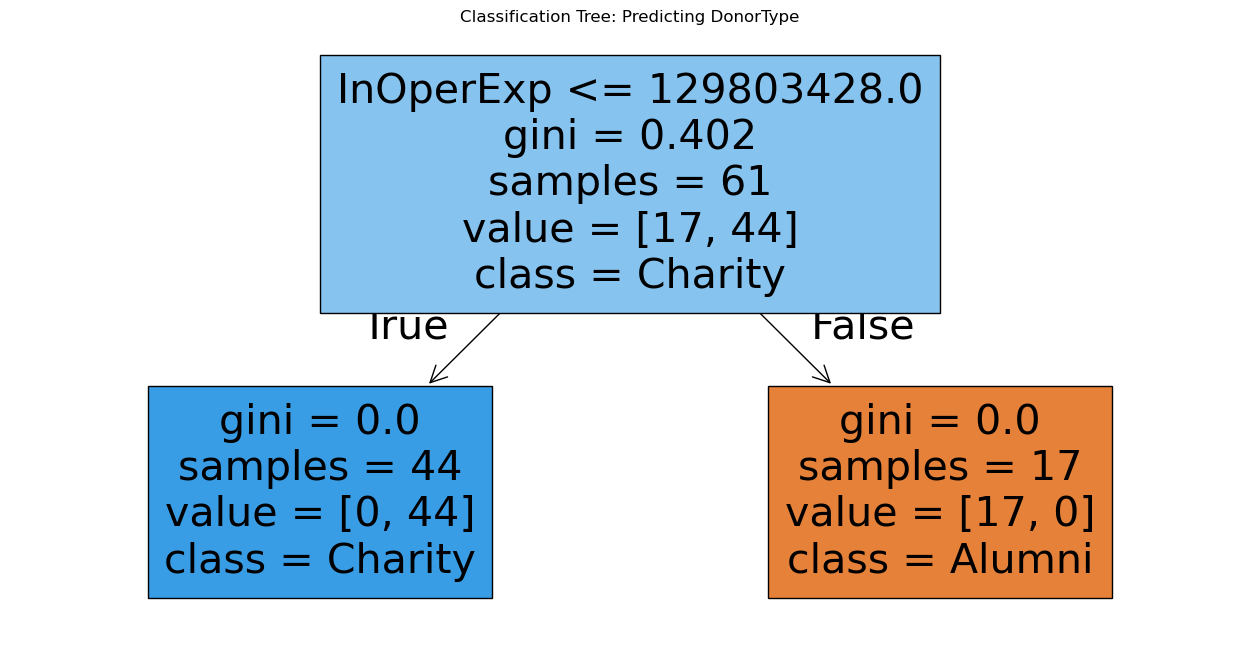

In [16]:
X_clf2 = data_model[['NoFTE', 'NetPatRev', 'InOperExp']] #define target
y_clf2 = data_model['DonorType_enc']
clf_tree2 = DecisionTreeClassifier(max_depth=3, random_state=0) #regression tree
clf_tree2.fit(X_clf2, y_clf2)
plt.figure(figsize=(16,8)) # plot
tree.plot_tree(clf_tree2, feature_names=X_clf2.columns, class_names=donor_enc.classes_, filled=True)
plt.title("Classification Tree: Predicting DonorType")
plt.show()

If I had to choose the most informative model, I’d go with the Operating Income Regression Tree. The splits were intuitive (tracing the revenue-expense-income logic) and gave a clear picture of how financial levers work in hospitals. It felt like a model that didn’t just “fit” the data—it helped explain it. That’s a big deal when working with state healthcare stakeholders who need actionable, interpretable results. That said, the TypeControl tree is also a great model, especially as a classification tool. 